In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv', header=None, index_col=[0])
df.head()



,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
df = df[[2,3]].reset_index(drop=True) 


In [4]:
df.columns = ['sentiment', 'text']
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [6]:
df.isnull().sum() 
df.dropna(inplace=True) 

In [7]:
df['text'].apply(len).value_counts() 
sum(df['text'].apply(len)>5),sum(df['text'].apply(len)<=5)

(72883, 2113)

In [8]:
print(df.shape)
df = df[df['text'].apply(len)>5] 
print(df.shape)

(74996, 2)
(72883, 2)


In [9]:
df['sentiment'].value_counts()


sentiment
Negative      22020
Positive      20186
Neutral       17899
Irrelevant    12778
Name: count, dtype: int64

In [10]:
import preprocess_kgptalkie as ps
df.columns 

Index(['sentiment', 'text'], dtype='object')

In [11]:
df = ps.get_basic_features(df)

In [12]:
df.columns

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

In [13]:
 df.head()


,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,im getting on borderlands and i will murder yo...,43,11,3.909091,6,0,0,1,0
1,Positive,I am coming to the borders and I will kill you...,40,12,3.333333,6,0,0,1,2
2,Positive,im getting on borderlands and i will kill you ...,41,10,4.100000,5,0,0,1,0
3,Positive,im coming on borderlands and i will murder you...,42,10,4.200000,5,0,0,1,0
4,Positive,im getting on borderlands 2 and i will murder ...,46,12,3.833333,6,0,0,2,0


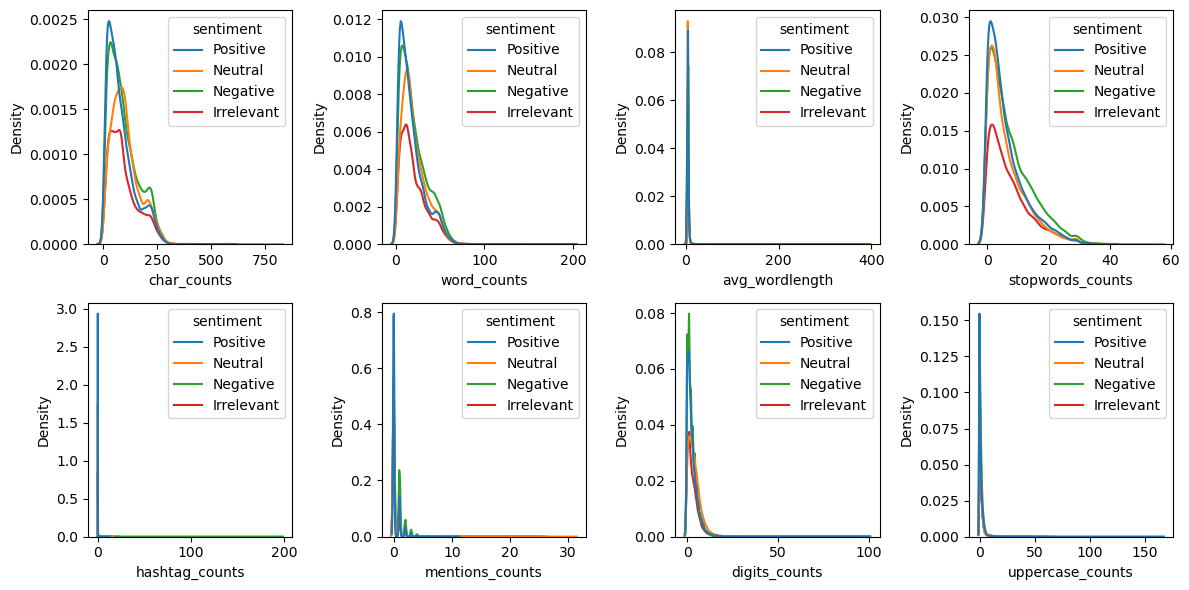

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
num_cols = df.select_dtypes(include='number').columns

for index, col in enumerate(num_cols):
    plt.subplot(2,4, index+1)
    sns.kdeplot(data=df,x=col, hue="sentiment",fill=False)

plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

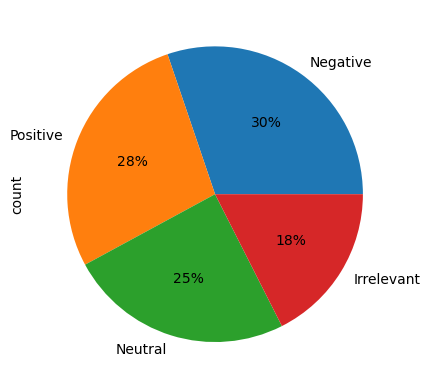

In [15]:
df['sentiment'].value_counts().plot(kind='pie', autopct="%1.0f%%")

In [16]:
from wordcloud import WordCloud , STOPWORDS
stopwords = set(STOPWORDS)


In [17]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [18]:
wordcloud = WordCloud(background_color = 'white',stopwords=stopwords,max_words=300, max_font_size=40,scale=5).generate(str(df['text']))

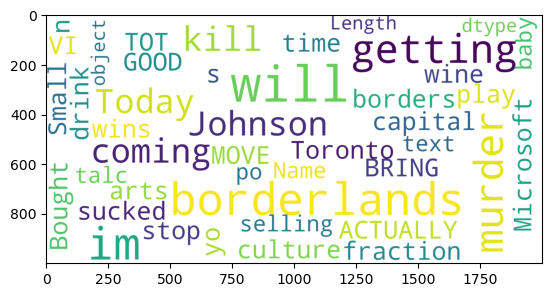

In [19]:
plt.imshow(wordcloud)

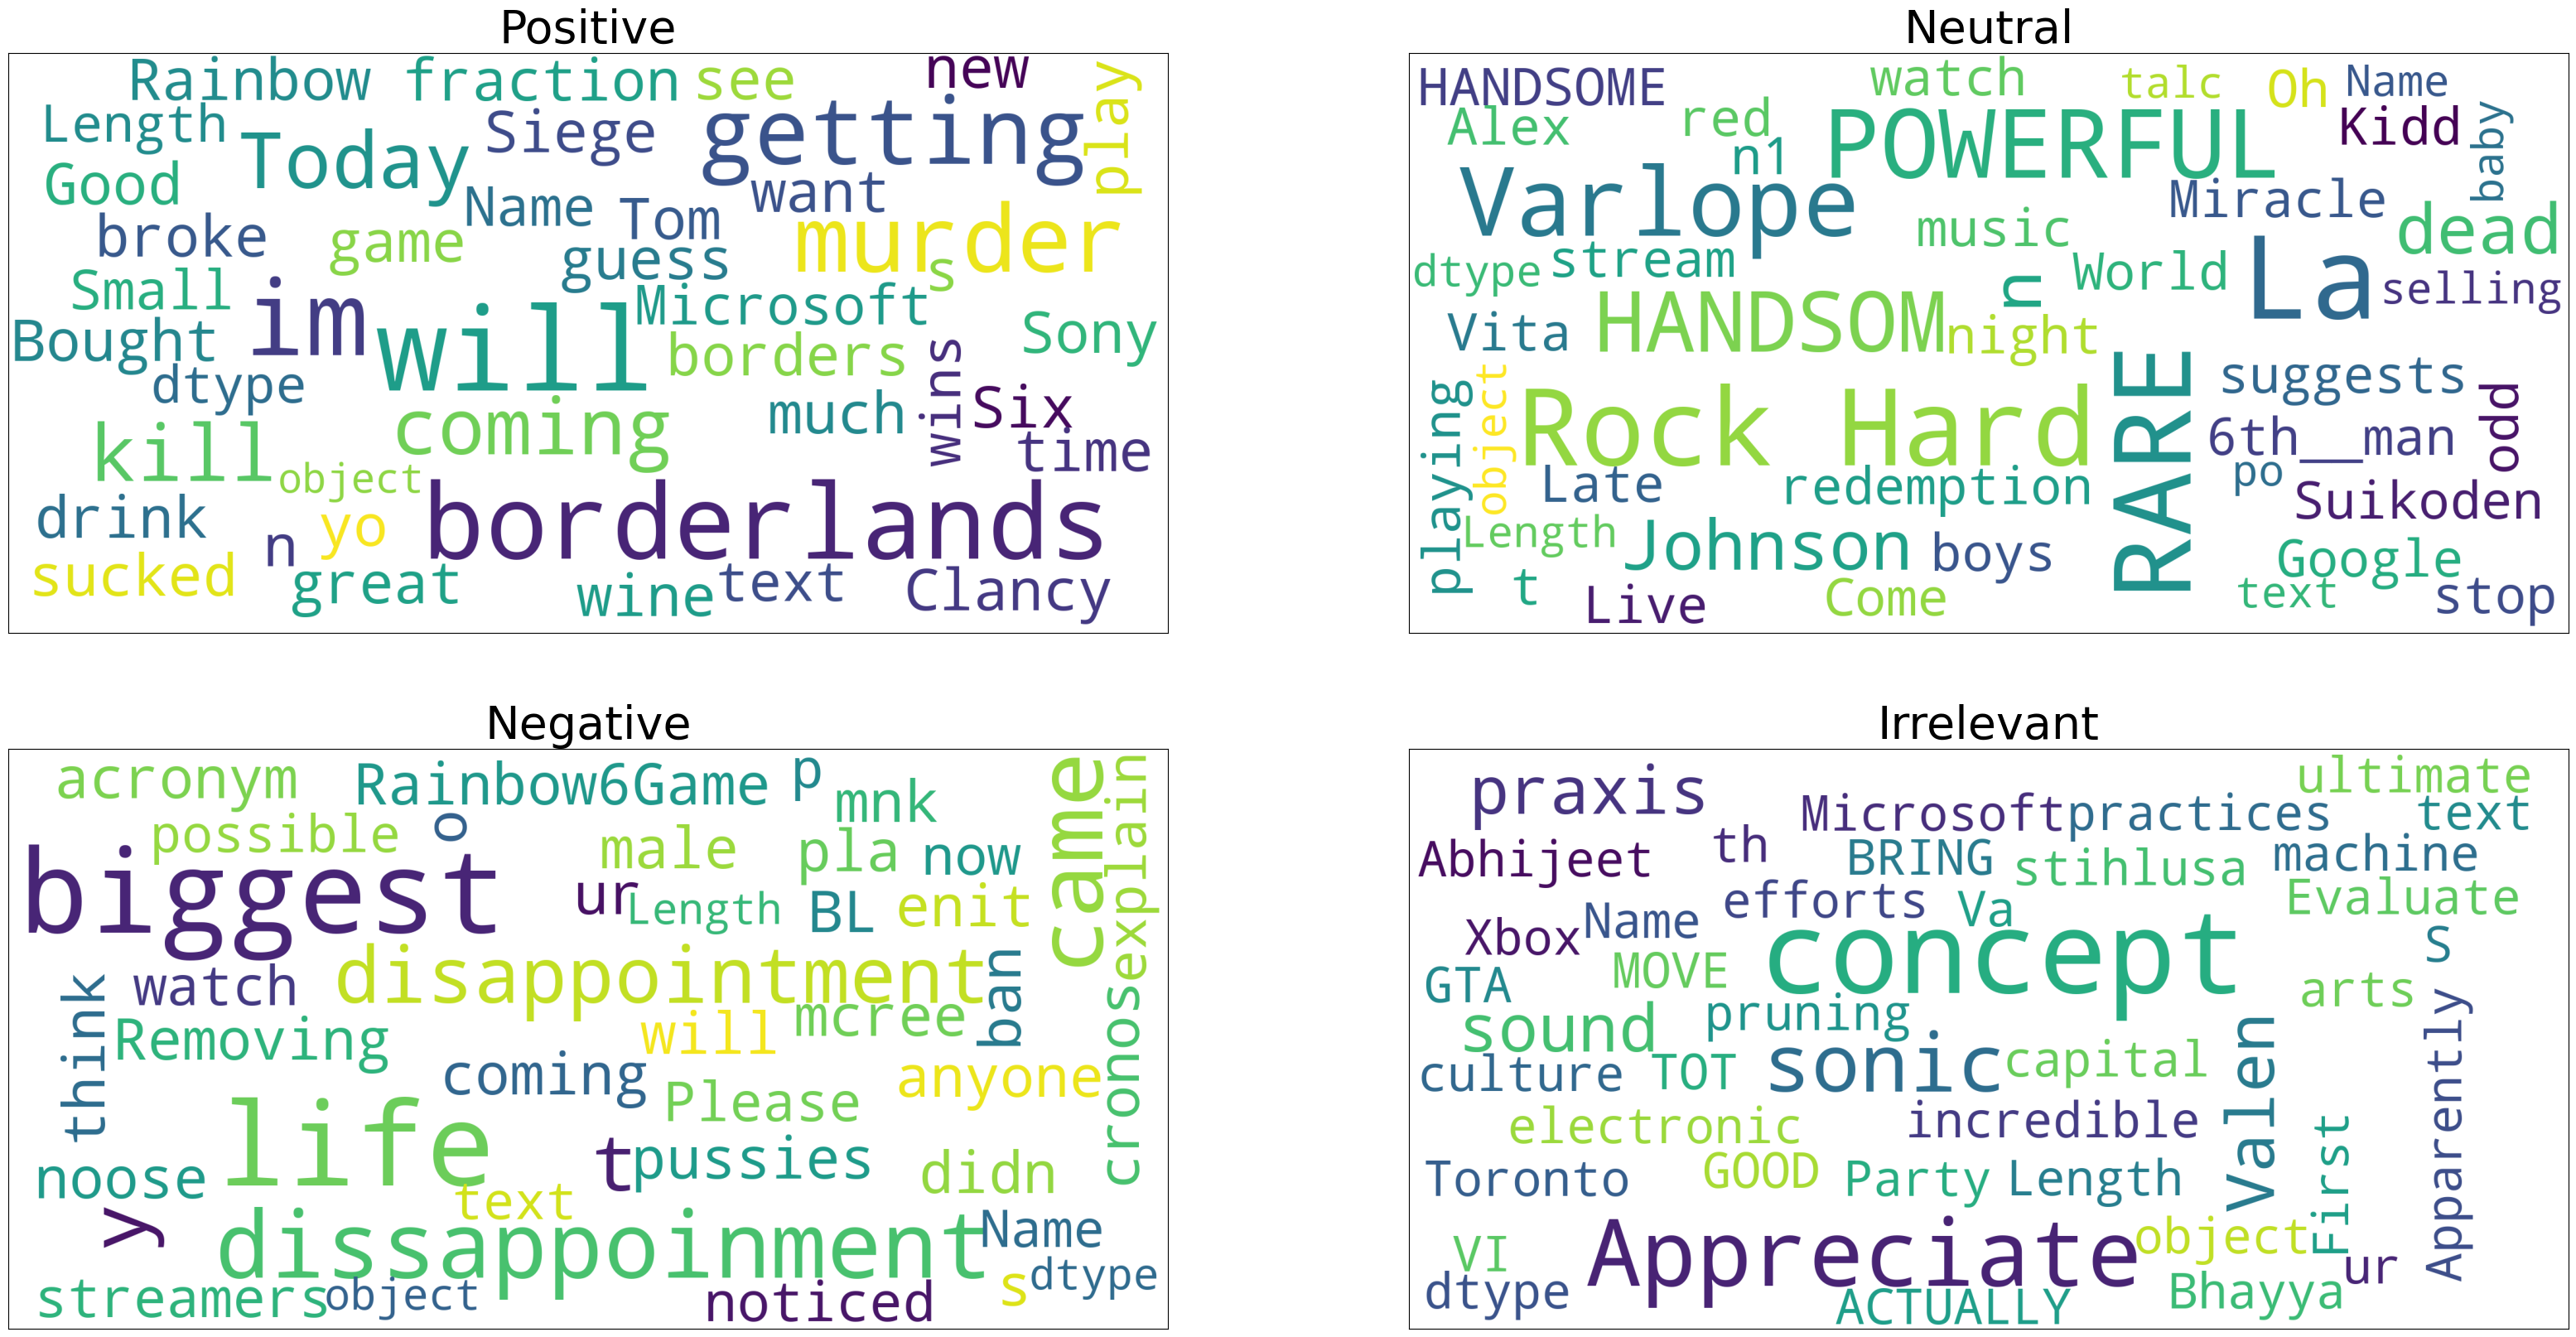

In [20]:
plt.figure(figsize=(40,20))

for index,sent in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2,index+1)
    data = df[df['sentiment']==sent]['text']
    wordcloud = WordCloud(background_color = 'white',stopwords=stopwords,max_words=300, max_font_size=40,scale=5).generate(str(data))
    plt.imshow(wordcloud)
    plt.xticks([])
    plt.yticks([])
    plt.title(sent, fontsize=40)
    

In [21]:
df['text']=df['text'].apply(lambda x: x.lower()) 
df['text']=df['text'].apply(lambda x: ps.remove_urls(x)) 
df['text']=df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text']=df['text'].apply(lambda x: ps.remove_rt(x)) 
df['text']=df['text'].apply(lambda x: ps.remove_special_chars(x))



In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'],df['sentiment'],test_size=0.2,random_state=0)

In [23]:
X_train.shape , X_test.shape

((58306,), (14577,))

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline 

In [25]:
stopwords_list = list(stopwords)

clf =Pipeline([('tfid',TfidfVectorizer(stop_words=stopwords_list)),('rfc',RandomForestClassifier(n_jobs=-1))]) 
clf.fit(X_train,y_train)

Pipeline(steps=[('tfid',
                 TfidfVectorizer(stop_words=['few', 'having', 'or', 'should',
                                             'you', 'no', 'our', 'into',
                                             'themselves', 'com', 'my', 'below',
                                             "isn't", 'these', 'did', "she's",
                                             'can', 'else', 'that', 'yours',
                                             'i', 'on', 'just', 'be', 'between',
                                             'also', 'him', 'me', 'she',
                                             "you've", ...])),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [26]:
from sklearn.metrics import accuracy_score

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions)*100)

92.19318103862248


In [27]:
import pickle
pickle.dump(clf, open("twitter_sentiment2.pkl",'wb'))

In [29]:
clf.predict(['sad'])

array(['Negative'], dtype=object)